In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('max_colwidth', 400)

In [11]:
df = pd.read_csv("../results/RIMB_wide_search2.csv")
columns = ["batch_size", "steps", "filters", "filter_scaling", "residual_weights", "train_cost", "train_chi_squared", "experiment_id"]
df[columns].sort_values(by="train_chi_squared")

,batch_size,steps,filters,filter_scaling,residual_weights,train_cost,train_chi_squared,experiment_id
29,1,10,128,1.0,sqrt,0.574278,29273194.0,RIMB_wide_search2_031_TS10_F128_FS1.0_IK5_L3_NLtanh_B1_RWsqrt_220131144141
6,10,10,64,1.0,sqrt,0.610705,29573056.0,RIMB_wide_search2_001_TS10_F64_FS1.0_IK3_L3_NLtanh_B10_RWsqrt_220131124220
26,1,6,64,2.0,sqrt,0.556323,30833440.0,RIMB_wide_search2_019_TS6_F64_FS2.0_IK7_L2_NLtanh_B1_RWsqrt_220131131836
5,10,8,64,1.0,sqrt,0.674441,31035344.0,RIMB_wide_search2_006_TS8_F64_FS1.0_IK5_L3_NLleaky_relu_B10_RWsqrt_220131130231
25,1,6,64,2.0,sqrt,0.533029,31574102.0,RIMB_wide_search2_017_TS6_F64_FS2.0_IK7_L2_NLtanh_B1_RWsqrt_220131131836
24,1,6,64,1.0,sqrt,0.602623,31619768.0,RIMB_wide_search2_014_TS6_F64_FS1.0_IK5_L3_NLtanh_B1_RWsqrt_220131131502
4,10,8,64,2.0,sqrt,0.578060,31693614.0,RIMB_wide_search2_009_TS8_F64_FS2.0_IK7_L2_NLtanh_B10_RWsqrt_220131130648
15,10,6,128,1.0,sqrt,0.629766,32639862.0,RIMB_wide_search2_027_TS6_F128_FS1.0_IK7_L2_NLleaky_relu_B10_RWsqrt_220131143753
20,1,8,256,1.0,uniform,0.280955,32745540.0,RIMB_wide_search2_005_TS8_F256_FS1.0_IK3_L2_NLtanh_B1_RWuniform_220131130235
7,10,6,256,1.0,sqrt,0.537307,33495404.0,RIMB_wide_search2_024_TS6_F256_FS1.0_IK7_L3_NLtanh_B10_RWsqrt_220131131836


In [3]:
from exorim import RIM, PhysicalModel
from exorim.simulated_data import CenteredBinariesDataset
from exorim.definitions import DTYPE, rad2mas
from exorim.models import Model
import tensorflow as tf
import os, json
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interactive

In [25]:
model = "RIMB_wide_search2_005_TS8_F256_FS1.0_IK3_L2_NLtanh_B1_RWuniform_220131130235"
# model = "RIMB_wide_search2_001_TS10_F64_FS1.0_IK3_L3_NLtanh_B10_RWsqrt_220131124220"
model_dir = os.path.join(os.getenv("EXORIM_PATH"), "models", model)
with open(os.path.join(model_dir, "model_hparams.json"), "r") as f:
    model_hparams = json.load(f)

args = Namespace()
with open(os.path.join(model_dir, "script_params.json"), "r") as f:
    vars(args).update(json.load(f))

model = Model(**model_hparams)

pixels = args.pixels
phys = PhysicalModel(
    pixels=pixels,
    wavelength=args.wavelength,
    logim=True,
    oversampling_factor=3#args.oversampling_factor,
    chi_squared=args.chi_squared
)
rim = RIM(
    model=model,
    physical_model=phys,
    steps=args.steps,
    log_floor=args.log_floor,
    adam=True,
)

ckpt = tf.train.Checkpoint(step=tf.Variable(1),  net=model)
checkpoint_manager = tf.train.CheckpointManager(ckpt, model_dir, max_to_keep=1)
checkpoint_manager.checkpoint.restore(checkpoint_manager.latest_checkpoint).expect_partial()

SyntaxError: invalid syntax (<ipython-input-25-69e8ab7f6078>, line 19)

In [13]:
def super_gaussian(I, x0, y0, width):
    x = np.arange(pixels) - pixels//2 + 0.5 * (pixels%2)
    x, y = np.meshgrid(x, x)

    rho = np.hypot(x - x0, y - y0)
    im = np.exp(-0.5 * (rho/width)**4)
    im /= im.sum()
    im *= I
    return im

def simuluate_binary(phys, angle=0., contrast=10., separation=2., width=2, sigma=1e-2):
    images = np.zeros(shape=[1, pixels, pixels, 1])
    for j in range(2):
        x0 = separation * np.cos(angle + j * np.pi)/2
        y0 = separation * np.sin(angle + j * np.pi)/2
        images[0, ..., 0] += super_gaussian(1. if j == 0 else 1/contrast, x0, y0, width)

    images = images / images.max(axis=(1, 2), keepdims=True)  # renormalize in the range [0, 1]
    images = tf.constant(images, dtype=DTYPE)
    X, sigma = phys.noisy_forward(images, np.tile(np.array(sigma)[None, None], [1, phys.nbuv]))
    return X, images, sigma

<ipython-input-14-0103e6d48096>:30: RuntimeWarning: divide by zero encountered in true_divide
  ufreq = 1 / rad2mas(1 / uv[:, 0] * wavel)
<ipython-input-14-0103e6d48096>:31: RuntimeWarning: divide by zero encountered in true_divide
  vfreq = 1 / rad2mas(1 / uv[:, 1] * wavel)


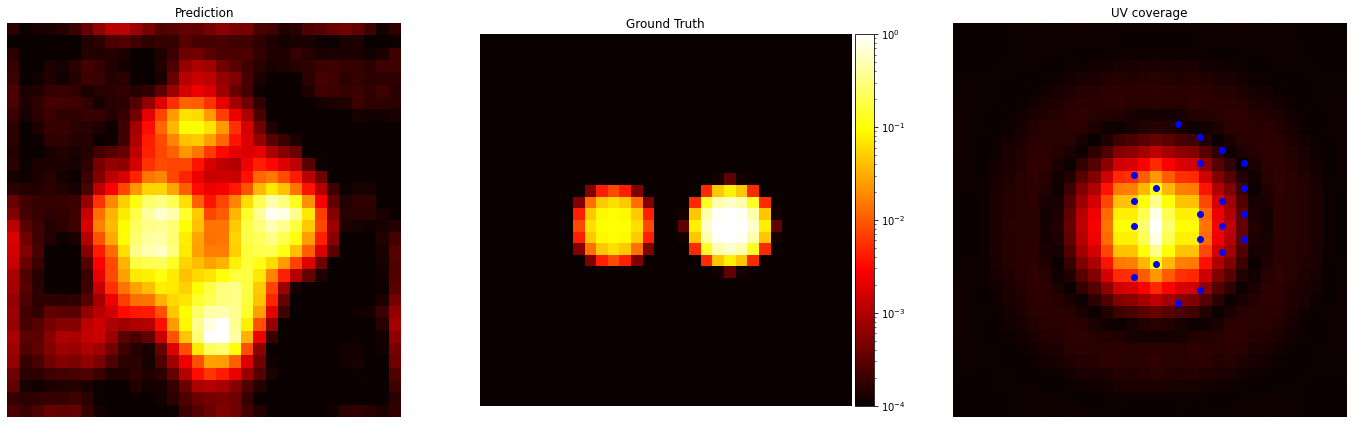

In [14]:
floor = 1e-4
def f(angle=0., contrast=10, separation=10, width=2, sigma=1e-2):
    _sigma = sigma
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    X, images, sigma = simuluate_binary(phys, angle, contrast, separation, width, sigma)
    predictions, chi_squared = rim.call(X, sigma)
    
    ax = axs[0]
    im = ax.imshow(predictions[-1, 0, ..., 0], cmap="hot", vmin=np.log10(floor), vmax=0)
    ax.axis("off")
    ax.set_title("Prediction")
    
    ax = axs[1]
    im = ax.imshow(np.maximum(images[0, ..., 0], floor), cmap="hot", norm=LogNorm(vmin=floor, vmax=1, clip=True))
    ax.axis("off")
    ax.set_title("Ground Truth")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    
    fft = np.abs(np.fft.fftshift(np.fft.fft2(images[..., 0])))[0]

    uv = phys.operators.UVC
    wavel = args.wavelength
    rho = np.hypot(uv[:, 0], uv[:, 1])
    fftfreq = np.fft.fftshift(np.fft.fftfreq(phys.pixels, phys.plate_scale))

    ax = axs[2]
    im = ax.imshow(np.abs(fft) + np.random.normal(size=np.abs(fft).shape, scale=_sigma), cmap="hot", extent=[fftfreq.min(), fftfreq.max()] * 2)
    ufreq = 1 / rad2mas(1 / uv[:, 0] * wavel)
    vfreq = 1 / rad2mas(1 / uv[:, 1] * wavel)
    ax.plot(ufreq, vfreq, "bo")
    ax.set_title("UV coverage")
    ax.axis("off")
    
interactive(f, separation=(2, 20), angle=(0, np.pi), contrast=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 100, 1000, 10000], width=[1, 2, 3, 4], sigma=[1e-1, 1e-2, 1e-3, 1e-4])

<ipython-input-14-0103e6d48096>:30: RuntimeWarning: divide by zero encountered in true_divide
  ufreq = 1 / rad2mas(1 / uv[:, 0] * wavel)
<ipython-input-14-0103e6d48096>:31: RuntimeWarning: divide by zero encountered in true_divide
  vfreq = 1 / rad2mas(1 / uv[:, 1] * wavel)


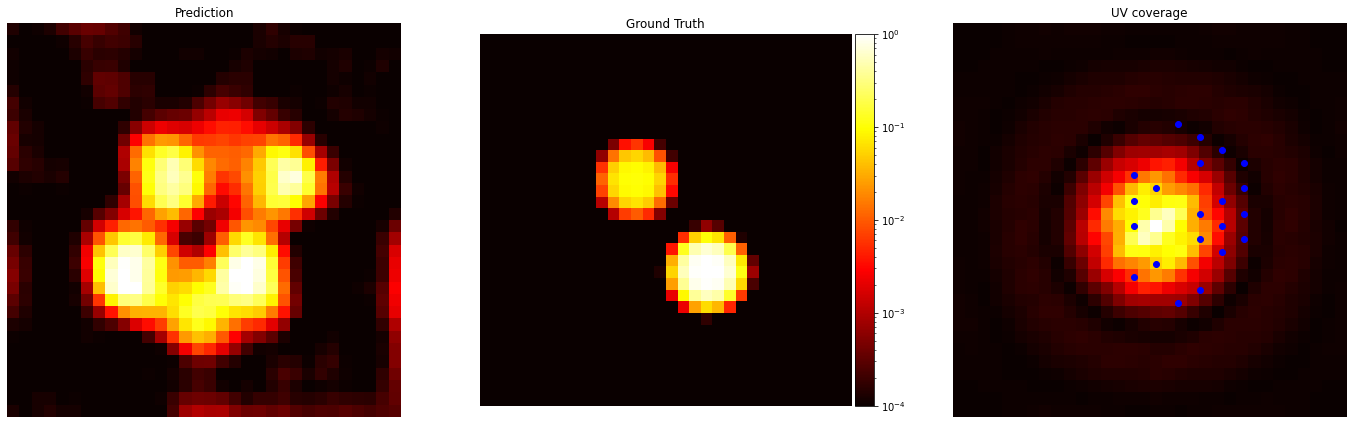

In [23]:
floor = 1e-4

    
f(angle=0.9, contrast=10, separation=10, width=2, sigma=1e-2)